## Documentation

* Purpose: "To examine the performance of two different types of AIDS treatments" (4 arms)

* Question to answer with clustering model (PCA) below, using PCA (condenses to 2 columns for easier clustering)

- Unsupervised (Clustering): Tsedenia, Josh, Victor do PCA on their own -- SEE BELOW (Josh)

    - What clusters of patients exist? -- NONE EASILY DISCERNABLE

* Question to answer with classification models below

    - How well do all the features predict mortality (cid)? -- SEE BELOW (ALTHOUGH MAY WANT TO REMOVE 'STRAT2' VARIABLE) *

    - Members answer the question on their own with assigned models

        - Logistic regression: Tsedenia, Josh, Victor -- SEE BELOW (Josh)
        
        - Decision Tree, Random Forest, Extreme Random Trees: Josh -- SEE BELOW (Josh)
        
        - KNN, SVM: Victor -- SEE BELOW (Josh)
        
        - Gradient Boosting, Ada Boost: Tsedenia Josh*
    

* Extra credit questions to answer with any models above

    - How well do all the features predict mortality (cid)? -- SEE BELOW (Josh)

    - Did the treatment success vary by characteristics: hemophilia, sex, race, gender, sexual orientation, history of IV drug use -- SEE BELOW (Josh)

    - Other characteristics include, weight, age

    - Which variable(s) are most predictive of survival or morbidity -- SEE BELOW (Josh)

    - Time to failure? (optional)

* Additional Figures

    - Kaplan-Meier

    - Cox proportional hazards ratio

* Preprocessing

    - Check select features for multicollinearity -- SEE BELOW (Josh)

* Optimization

    - Split and scale -- SEE BELOW (Josh)
    - Resample for any imbalanced data -- SEE BELOW (Josh)

* Presentation focus
    - What we've accomplished (what are we offering now)
    - What we will need to deliver more (what value we will provide (given defined resources))

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://drive.google.com/file/d/1ofiJPKb9Ji8aivZlApooyp2Qa_yHgrp9/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [3]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [4]:
df_copy = df.copy()

df_copy.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

## Check for Multicollinearity (relevant for logistic regression classification)
## Note: str2 and strat appear to be correlated

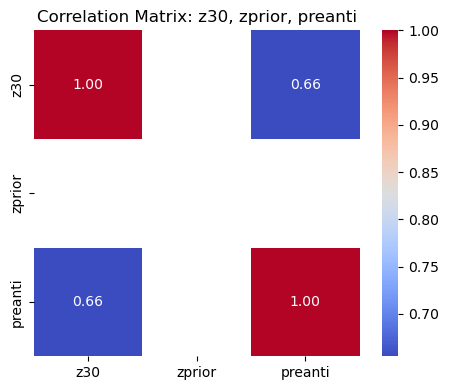

   feature   VIF
0      z30  1.75
1   zprior  2.24
2  preanti  1.75


In [6]:
# Potential multicollinearity between features per antiretroviral medication: 'z30', 'zprior', 'preanti'

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select relevant columns and drop rows with missing values
z_vars = df_copy[['z30', 'zprior', 'preanti']].dropna()

# Compute correlation matrix
corr_matrix_z = z_vars.corr()

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix_z, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix: z30, zprior, preanti")
plt.tight_layout()
plt.show()

# Add intercept (constant) for VIF calculation
X_z = add_constant(z_vars)

# Create VIF table
vif_z_data = pd.DataFrame()
vif_z_data["feature"] = X_z.columns
vif_z_data["VIF"] = [variance_inflation_factor(X_z.values, i) for i in range(X_z.shape[1])]

# Display VIF results
print(vif_z_data.round(2))


### Safe to inclulde all 3 variables due to the following:
- All VIF values are well below 5 — no signs of problematic multicollinearity.
- Moderate pairwise correlation is present, but not enough to distort regression estimates or cause instability.


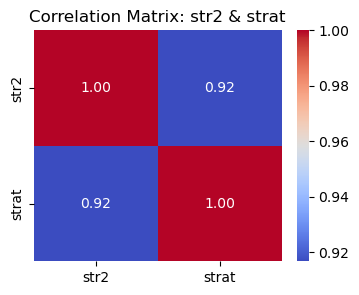

  feature    VIF
0   const  10.17
1    str2   6.26
2   strat   6.26


In [7]:
# Potential multicollinearity between features per antiretroviral history: 'str2', 'strat'

# Select relevant columns and drop rows with missing values
strat_vars = df_copy[['str2', 'strat']].dropna()

# Correlation matrix
corr_matrix_strat = strat_vars.corr()

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix_strat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: str2 & strat")
plt.show()

# Add intercept (constant) for VIF calculation
X_strat = add_constant(strat_vars)

# VIF calculation
vif_strat_data = pd.DataFrame()
vif_strat_data["feature"] = X_strat.columns
vif_strat_data["VIF"] = [variance_inflation_factor(X_strat.values, i) for i in range(X_strat.shape[1])]

# Display VIF results
print(vif_strat_data.round(2))


### NOT SAFE to inclulde both variables due to the following, RECOMMEND keeping 'strat' since it retains more information due to having 3 unique values: {1: 886, 2: 410, 3: 843} than 'str2'.
- VIF values are above 5, which indicates problematic multicollinearity

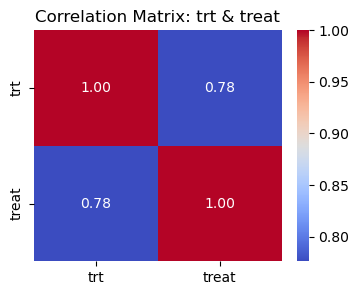

  feature   VIF
0   const  4.02
1     trt  2.51
2   treat  2.51


In [8]:
# Potential multicollinearity between features per treatments: 'trt', 'treat'

# Select relevant columns and drop rows with missing values
trt_vars = df_copy[['trt', 'treat']].dropna()

# Correlation matrix
corr_matrix_trt = trt_vars.corr()

# Heatmap visualization
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix_trt, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: trt & treat")
plt.show()

# Add intercept (constant) for VIF calculation
X_trt = add_constant(trt_vars)

# VIF calculation
vif_trt_data = pd.DataFrame()
vif_trt_data["feature"] = X_trt.columns
vif_trt_data["VIF"] = [variance_inflation_factor(X_trt.values, i) for i in range(X_trt.shape[1])]

# Display results
print(vif_trt_data.round(2))


### Safe to inclulde both variables due to the following:
- VIF values are 2.51, indicates moderate correlation but not severe multicollinearity
- These features might be related but not strongly dependent

### In HIV-positive individuals: CD4 goes down, CD8 may go up → inverse correlation or more complex dynamics.

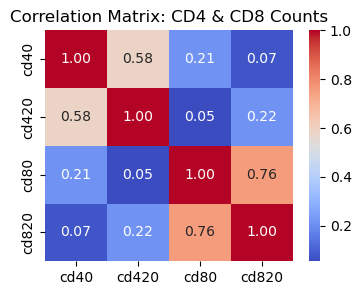

  feature    VIF
0   const  13.83
1    cd40   1.87
2   cd420   1.89
3    cd80   2.95
4   cd820   2.94


In [9]:
# Potential multicollinearity between features per CD4 and CD8 counts: 'cd40', 'cd420', 'cd80', 'cd820'

# Select relevant columns and drop rows with missing values
cd_vars = df_copy[['cd40', 'cd420', 'cd80', 'cd820']].dropna()

# Create a correlation matrix
corr_matrix_cd = cd_vars.corr()

# Heatmap the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix_cd, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: CD4 & CD8 Counts")
plt.show()

# Add intercept (constant) for VIF calculation
X_cd = add_constant(cd_vars)

# Create a VIF table
vif_cd_data = pd.DataFrame()
vif_cd_data['feature'] = X_cd.columns
vif_cd_data['VIF'] = [variance_inflation_factor(X_cd.values, i) for i in range(X_cd.shape[1])]

print(vif_cd_data.round(2))

### Safe to include all variables due to the following:
- VIF scores for cd40 and cd420 are well below 5
- VIF scores for cd80 and cd820 are moderately correlated but safe to use

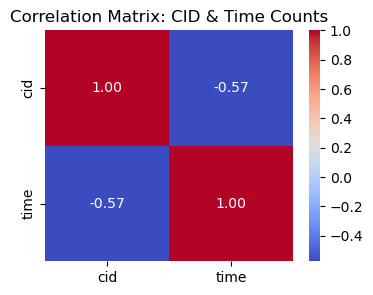

  feature    VIF
0   const  17.94
1     cid   1.49
2    time   1.49


In [10]:
# Potential multicollinearity between features per CD4 and CD8 counts: 'cd40', 'cd420', 'cd80', 'cd820'

# Select relevant columns and drop rows with missing values
cid_vars = df_copy[['cid', 'time']].dropna()

# Create a correlation matrix
corr_matrix_cd = cid_vars.corr()

# Heatmap the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix_cd, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: CID & Time Counts")
plt.show()

# Add intercept (constant) for VIF calculation
X_cd = add_constant(cid_vars)

# Create a VIF table
vif_cid_data = pd.DataFrame()
vif_cid_data['feature'] = X_cd.columns
vif_cid_data['VIF'] = [variance_inflation_factor(X_cd.values, i) for i in range(X_cd.shape[1])]

print(vif_cid_data.round(2))

# Remove str2 from df

In [11]:
df_copy = df_copy.drop(columns='str2')
df_copy.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


## Split and Scale

In [12]:
# split df_copy into features and target
X = df_copy.drop('cid', axis=1)
y = df_copy['cid']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                       # Step 1: Create the scaler
scaler.fit(X_train)                           # Step 2: Fit ONLY on training data
X_train_scaled = scaler.transform(X_train)    # Step 3: Transform training data
X_test_scaled = scaler.transform(X_test)      # Step 4: Transform test data using same scaler


In [15]:
X_train_scaled
X_test_scaled

array([[ 0.66627439, -1.34628119,  0.68498502, ..., -1.10577449,
        -0.39093715, -0.53750798],
       [-1.93835805, -1.34628119,  2.06210969, ...,  0.1363192 ,
        -0.25253751, -0.38336266],
       [ 0.71381657, -1.34628119, -0.2330981 , ..., -1.00396353,
         0.36493777, -0.30161893],
       ...,
       [ 0.35385433,  1.32518483,  1.14402658, ..., -0.85464079,
         0.16266138,  0.44108125],
       [ 0.60514873,  1.32518483,  1.02926619, ...,  2.26756194,
        -0.40158327, -0.49546835],
       [ 0.37083368,  0.43469615, -0.57737927, ...,  0.21776797,
         1.72125417,  0.49012749]])

## Cluster using PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [33]:
# After fitting PCA, Check Explained Variance of PC1 and PC2
explained_var = pca.explained_variance_ratio_

# Print each component's contribution
print(f"PC1: {explained_var[0]:.4f}")
print(f"PC2: {explained_var[1]:.4f}")
print(f"Total (PC1 + PC2): {explained_var[0] + explained_var[1]:.4f}")


PC1: 0.1331
PC2: 0.1089
Total (PC1 + PC2): 0.2420


### The 2D PCA plot is compressing ~76% of the information in your original feature space.

    - Any clusters, separations, or groupings in the 2D plot ahead may not fully represent what's happening in the full feature space.
    - Show caution about over-interpreting those visual patterns.

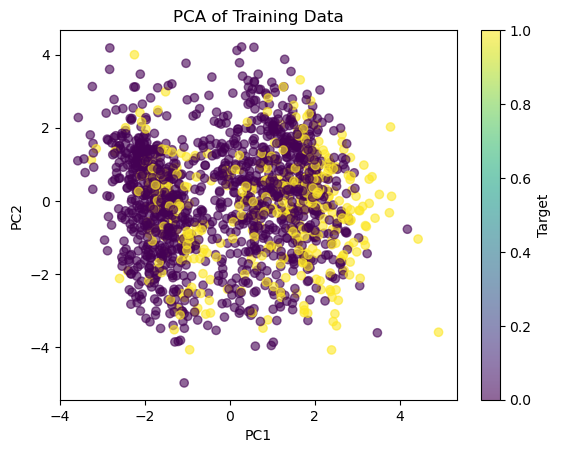

In [34]:
# Generate 2D view of the clusters

import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Training Data')
plt.colorbar(label='Target')
plt.show()


In [35]:
df_copy['cid'].value_counts()

cid
0    1618
1     521
Name: count, dtype: int64

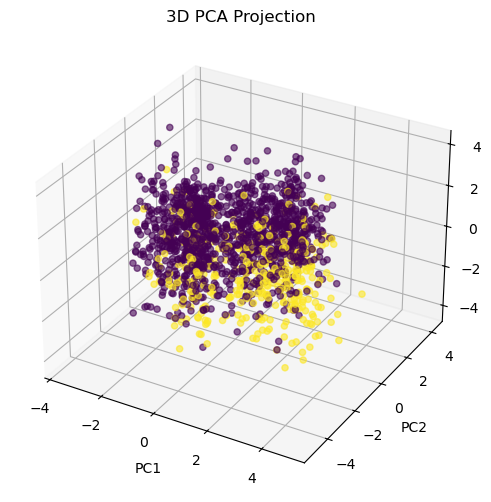

In [41]:
# Fit PCA with 3 components for 3D plotting

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Fit PCA with 3 components
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# ✅ Use the correct 3D PCA output here:
ax.scatter(
    X_train_pca_3d[:, 0],  # PC1
    X_train_pca_3d[:, 1],  # PC2
    X_train_pca_3d[:, 2],  # PC3
    c=y_train, cmap='viridis', alpha=0.6
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA Projection')
plt.show()

In [42]:
print(pca_3d.explained_variance_ratio_)
print(f"Total (PC1 + PC2 + PC3): {sum(pca_3d.explained_variance_ratio_):.4f}")

[0.13310275 0.10887509 0.09736284]
Total (PC1 + PC2 + PC3): 0.3393


### >>Visually and in calculation, there's no clear clustering with either 2 or 3 components. Neither is it clear to me the clusters in 2D or 3D. I'm not sure there's value in clustering this data set.

## Evaluate using KNN based on PCA output, including resampling

In [19]:
# Resample using RandomOverSampler and evaluate

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_bal, y_train_bal = ros.fit_resample(X_train_pca, y_train)

In [20]:
# Did the ROS resampling work?

import numpy as np
from collections import Counter

print("Before resampling:", Counter(y_train))
print("After resampling: ", Counter(y_train_bal))


Before resampling: Counter({0: 1213, 1: 391})
After resampling:  Counter({1: 1213, 0: 1213})


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_bal, y_train_bal)

y_pred_knn = knn.predict(X_test_pca)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.70       405
           1       0.33      0.60      0.42       130

    accuracy                           0.60       535
   macro avg       0.58      0.60      0.56       535
weighted avg       0.70      0.60      0.63       535



In [22]:
# Resample using SMOTE and evaluate

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_bal, y_train_bal = smote.fit_resample(X_train_pca, y_train)

In [23]:
# Did the SMOTE resampling work?

import numpy as np
from collections import Counter

print("Before resampling:", Counter(y_train))
print("After resampling: ", Counter(y_train_bal))

Before resampling: Counter({0: 1213, 1: 391})
After resampling:  Counter({1: 1213, 0: 1213})


In [24]:
# 5. Train KNN
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)

# 6. Predict + Evaluate
y_pred_knn = knn.predict(X_test_pca)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       405
           1       0.34      0.55      0.42       130

    accuracy                           0.64       535
   macro avg       0.58      0.61      0.58       535
weighted avg       0.70      0.64      0.66       535



### >>PCA+KNN is a poor model given the low precision, recall, and F1 scores for "failure" (1) throughout

## Evaluate using SVM based on PCA output, including resampling

In [25]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# --- RANDOM OVERSAMPLER ---
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)

print("Before ROS:", Counter(y_train))
print("After ROS: ", Counter(y_train_ros))

svm_ros = SVC(kernel='rbf', class_weight='balanced')
svm_ros.fit(X_train_ros, y_train_ros)

y_pred_svm_ros = svm_ros.predict(X_test_pca)

print("SVM Classification Report w/ROS:")
print(classification_report(y_test, y_pred_svm_ros))

Before ROS: Counter({0: 1213, 1: 391})
After ROS:  Counter({1: 1213, 0: 1213})
SVM Classification Report w/ROS:
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       405
           1       0.36      0.61      0.45       130

    accuracy                           0.64       535
   macro avg       0.60      0.63      0.59       535
weighted avg       0.72      0.64      0.66       535



In [26]:
# --- SMOTE ---
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Did the resampling work?
print("Before SMOTE: ", Counter(y_train))
print("After SMOTE: ", Counter(y_train_smote))

svm_smote = SVC(kernel='rbf', class_weight='balanced')
svm_smote.fit(X_train_smote, y_train_smote)

y_pred_svm_smote = svm_smote.predict(X_test_pca)

print("SVM Classification Report w/SMOTE:")
print(classification_report(y_test, y_pred_svm_smote))

Before SMOTE:  Counter({0: 1213, 1: 391})
After SMOTE:  Counter({1: 1213, 0: 1213})
SVM Classification Report w/SMOTE:
              precision    recall  f1-score   support

           0       0.84      0.62      0.72       405
           1       0.35      0.63      0.45       130

    accuracy                           0.63       535
   macro avg       0.60      0.63      0.58       535
weighted avg       0.72      0.63      0.65       535



#### Even after forcing classification through unsupervised dimensionality reduction (PCA to KNN and SVC), the models underperformed as shown by the repeatedly low F1 scores. Or as ChatGPT put it: “PCA didn’t help classification performance in this case. It reduced dimensionality, but not in a way that preserved class boundaries—so even after applying KNN or SVM, the model struggled, especially with the minority class. This points to a mismatch between unsupervised dimensionality reduction and the needs of the supervised task.”

#### I'm not convinced PCA was a strong approach given that the dataset only had around 20 columns, certainly not a high-dimensional dataset. What if we just run it without PCA?

In [27]:
# 1. Split (from df_copy)
X_nopca = df.drop('cid', axis=1)
y_nopca = df['cid']

X_train_nopca, X_test_nopca, y_train_nopca, y_test_nopca = train_test_split(
    X_nopca, y_nopca, test_size=0.2, random_state=42
)

# 2. Scale
scaler_nopca = MinMaxScaler()
X_train_scaled_nopca = scaler_nopca.fit_transform(X_train_nopca)
X_test_scaled_nopca = scaler_nopca.transform(X_test_nopca)

# 3. Resample
smote_nopca = SMOTE(random_state=42)
X_train_bal_nopca, y_train_bal_nopca = smote_nopca.fit_resample(X_train_scaled_nopca, y_train_nopca)
print("After SMOTE:", Counter(y_train_bal_nopca))

# 4. Fit SVM model
svm_nopca = SVC(kernel='rbf', class_weight='balanced')
svm_nopca.fit(X_train_bal_nopca, y_train_bal_nopca)

# 5. Predict + Evaluate
y_pred_svm_nopca = svm_nopca.predict(X_test_scaled_nopca)
print("SVM Classification Report (no PCA):")
print(classification_report(y_test_nopca, y_pred_svm_nopca))


NameError: name 'MinMaxScaler' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, classification_report

# Dictionary of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(max_depth=5, class_weight='balanced'),
    'Extremely Randomized Trees': ExtraTreesClassifier(max_depth=5, class_weight='balanced'),
    'SVM (RBF Kernel)': SVC(kernel='rbf', class_weight='balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'AdaBoost': AdaBoostClassifier(n_estimators=100)
}

# Store F1 scores
f1_scores = {}

# New dictionary to store fitted models
fitted_models = {}

for name, model in models.items():
    try:
        model.fit(X_train_bal_nopca, y_train_bal_nopca)
        y_pred = model.predict(X_test_scaled_nopca)
        
        print(f"\n{name} Classification Report:")
        print(classification_report(y_test_nopca, y_pred))
        
        f1 = f1_score(y_test_nopca, y_pred, average='weighted')
        f1_scores[name] = f1

        # Save the trained model
        fitted_models[name] = model

    except Exception as e:
        print(f"\n{name} failed: {e}")

# Print a summary of F1 scores
print("\nModel F1 Score Summary (weighted):")
for name, score in sorted(f1_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {score:.3f}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       327
           1       0.68      0.76      0.72       101

    accuracy                           0.86       428
   macro avg       0.80      0.82      0.81       428
weighted avg       0.87      0.86      0.86       428


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       327
           1       0.65      0.79      0.71       101

    accuracy                           0.85       428
   macro avg       0.79      0.83      0.81       428
weighted avg       0.86      0.85      0.86       428


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       327
           1       0.70      0.81      0.75       101

    accuracy                           0.87       428
   macro

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       327
           1       0.69      0.80      0.74       101

    accuracy                           0.87       428
   macro avg       0.81      0.85      0.83       428
weighted avg       0.88      0.87      0.87       428


Model F1 Score Summary (weighted):
Gradient Boosting: 0.884
Random Forest: 0.877
AdaBoost: 0.872
Logistic Regression: 0.860
SVM (RBF Kernel): 0.860
Decision Tree: 0.855
Extremely Randomized Trees: 0.836
KNN: 0.753


In [ ]:
# Reattach feature names to the NumPy array
feature_names = X_nopca.columns
X_train_bal_nopca_df = pd.DataFrame(X_train_bal_nopca, columns=feature_names)

# Get the trained Random Forest model
rf_model = fitted_models['Random Forest']

# Build the importance DataFrame
rf_importances = pd.DataFrame({
    'feature': X_train_bal_nopca_df.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Display the top 10 features
print(rf_importances.round(2).head(10))


    feature  importance
0      time        0.56
20    cd420        0.12
7    karnof        0.05
19     cd40        0.05
11  preanti        0.03
15    strat        0.03
21     cd80        0.02
18   offtrt        0.02
1       trt        0.02
16  symptom        0.01


### Random Forest importance scores indicated that time was the most predictive feature of mortality in this dataset.

# Associations between patient characteristics and mortality by treatment arm

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  strat    2139 non-null   int64  
 15  symptom  2139 non-null   int64  
 16  treat    2139 non-null   int64  
 17  offtrt   2139 non-null   int64  
 18  cd40     2139 non-null   int64  
 19  cd420    2139 non-null   int64  
 20  cd80     2139 non-null   int64  
 21  cd820    2139 

In [ ]:
# Calculate chi-squares and logistic regressions
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm

binary_vars = ['gender', 'race', 'homo', 'drugs', 'hemo']

for arm in sorted(df_copy['trt'].unique()):
    print(f"\n=== Treatment Arm {arm} ===")
    df_arm = df_copy[df_copy['trt'] == arm]
    
    # Chi-square tests
    for var in binary_vars:
        contingency_table = pd.crosstab(df_arm[var], df_arm['cid'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"  {var}: chi2 p = {p:.4f}")
    
    # Logistic regression
    X = df_arm[binary_vars]
    X = sm.add_constant(X)
    y = df_arm['cid']
    
    try:
        model = sm.Logit(y, X).fit(disp=0)
        odds_ratios = np.exp(model.params)
        print("\n  Odds Ratios:")
        print(odds_ratios.round(3))
        print("  P-values:")
        print(model.pvalues.round(4))
    except Exception as e:
        print(f"  Could not fit model: {e}")


=== Treatment Arm 0 ===
  gender: chi2 p = 0.0459
  race: chi2 p = 0.0543
  homo: chi2 p = 0.1056
  drugs: chi2 p = 0.1623
  hemo: chi2 p = 0.7888

  Odds Ratios:
const     0.444
gender    1.679
race      0.731
homo      0.837
drugs     0.677
hemo      0.652
dtype: float64
  P-values:
const     0.0034
gender    0.1473
race      0.1726
homo      0.5800
drugs     0.2304
hemo      0.3353
dtype: float64

=== Treatment Arm 1 ===
  gender: chi2 p = 0.1530
  race: chi2 p = 0.0539
  homo: chi2 p = 0.0556
  drugs: chi2 p = 0.1199
  hemo: chi2 p = 1.0000

  Odds Ratios:
const     0.218
gender    1.148
race      0.633
homo      1.279
drugs     0.593
hemo      0.974
dtype: float64
  P-values:
const     0.0000
gender    0.7738
race      0.1209
homo      0.5653
drugs     0.1797
hemo      0.9631
dtype: float64

=== Treatment Arm 2 ===
  gender: chi2 p = 0.3877
  race: chi2 p = 0.6852
  homo: chi2 p = 0.4784
  drugs: chi2 p = 0.1878
  hemo: chi2 p = 0.2649

  Odds Ratios:
const     0.217
gender    0.